## Assignment 1

Nama         : Natalie Novenrodumetasa

Kode Peserta : PYTN-KS09-001

Batch        : 3

## Dataset

In [1]:
#dataset
import pandas as pd
import numpy as np

#visualisasi data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
mpl.style.use(['ggplot'])

In [2]:
data = pd.read_csv("london_crime_by_lsoa.csv")
data

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [6]:
data.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [7]:
data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [8]:
data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
data['major_category']

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [10]:
data['minor_category']

0           Burglary in Other Buildings
1                        Other violence
2                        Other violence
3           Burglary in Other Buildings
4                     Personal Property
                       ...             
13490599    Criminal Damage To Dwelling
13490600              Personal Property
13490601         Burglary in a Dwelling
13490602              Business Property
13490603                   Wounding/GBH
Name: minor_category, Length: 13490604, dtype: object

In [11]:
data['major_category'].isnull()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: major_category, Length: 13490604, dtype: bool

In [12]:
data['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [13]:
data['minor_category'].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [14]:
data2 = data[data['value']== 1]

In [15]:
data2

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


In [16]:
data2['minor_category'].value_counts()

Burglary in a Dwelling                    154845
Theft From Motor Vehicle                  151633
Assault with Injury                       138647
Other Theft                               136743
Common Assault                            135116
Harassment                                135016
Criminal Damage To Motor Vehicle          124756
Theft/Taking Of Motor Vehicle             122568
Possession Of Drugs                       112104
Burglary in Other Buildings               108190
Criminal Damage To Dwelling                96217
Personal Property                          92874
Other Criminal Damage                      88923
Other Theft Person                         77223
Theft/Taking of Pedal Cycle                72838
Wounding/GBH                               68261
Other Notifiable                           61176
Theft From Shops                           45207
Criminal Damage To Other Building          43873
Motor Vehicle Interference & Tampering     42866
Other violence      

In [17]:
#merubah nama columns
data.rename(columns={'borough':'region'},
            inplace=True)

In [18]:
data

,lsoa_code,region,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [19]:
data.drop(['lsoa_code','major_category'], axis=1, inplace=True)

In [20]:
data

,region,minor_category,value,year,month
0,Croydon,Burglary in Other Buildings,0,2016,11
1,Greenwich,Other violence,0,2016,11
2,Bromley,Other violence,0,2015,5
3,Redbridge,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Personal Property,1,2015,6
13490601,Sutton,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Business Property,0,2011,5


In [21]:
data_group = data.groupby(['year','region']).size()
data_group

year  region              
2008  Barking and Dagenham    34560
      Barnet                  63648
      Bexley                  42852
      Brent                   54516
      Bromley                 58212
                              ...  
2016  Sutton                  35832
      Tower Hamlets           45792
      Waltham Forest          45144
      Wandsworth              55404
      Westminster             40740
Length: 297, dtype: int64

In [22]:
#mengelompokkan total data kejahatan berdasarkan minor category dan year 
data_minor = data.groupby(['minor_category', 'year'])['value'].sum().reset_index()

#membuat data minor category menjadi index dengan metode pivot table
data_minor = pd.pivot_table(data_minor, values='value', index='minor_category', columns='year')

#membuat kolom total per minor
data_minor['Total'] = data_minor.sum(axis=1)
data_minor.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
minor_category,,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001
Burglary in Other Buildings,31437,30434,29703,30876,31676,30685,27078,25833,25289,263011
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Business Property,2964,3115,3041,2685,2450,2026,1642,1718,1654,21295
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440,413690


In [23]:
data_minor

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
minor_category,,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001
Burglary in Other Buildings,31437,30434,29703,30876,31676,30685,27078,25833,25289,263011
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Business Property,2964,3115,3041,2685,2450,2026,1642,1718,1654,21295
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440,413690
Counted per Victim,3840,0,0,0,0,0,0,0,0,3840
Criminal Damage To Dwelling,23519,22475,20253,18037,15330,13512,13391,13648,13951,154116
Criminal Damage To Motor Vehicle,41693,36621,32907,29494,25777,23452,24137,25595,25787,265463
Criminal Damage To Other Building,9011,8348,7962,7445,6753,6367,6641,6776,6700,66003


## Area Plot

Question : Kejahatan yang termasuk kategori minor apa yang paling sering terjadi di London?

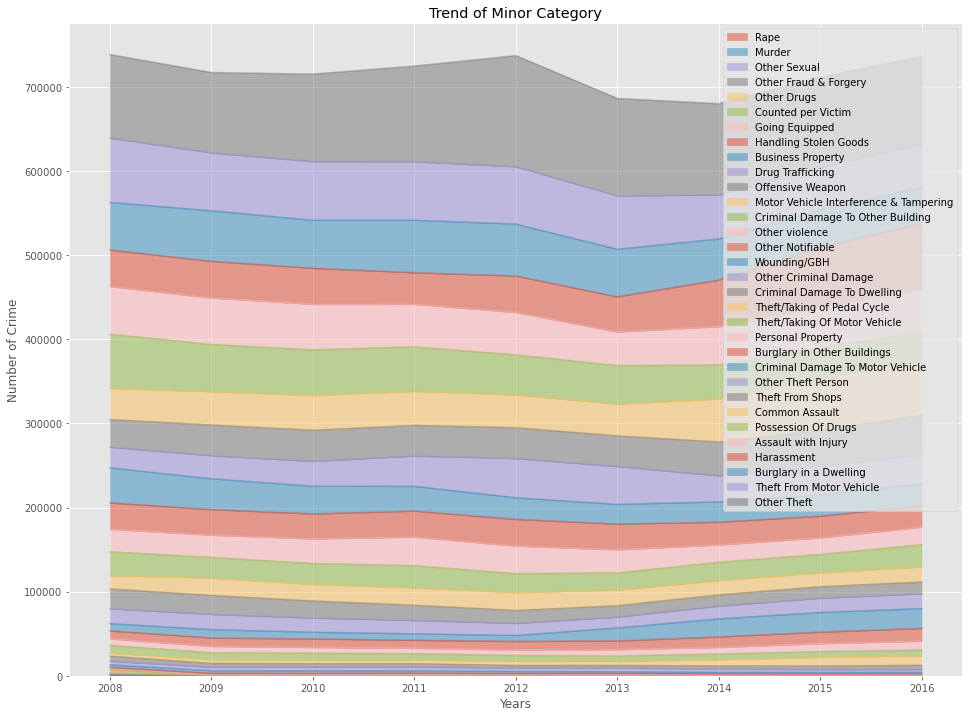

In [24]:
#sort data berdasarkan total masing-masing minor category
data_least_crime = data_minor.sort_values(by='Total')

#membuat area plot 
data_least_crime.drop('Total',axis=1).transpose().plot(kind='area', figsize=(16,12), alpha=0.5, stacked=True)
plt.legend(loc='upper right')
plt.title('Trend of Minor Category')
plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.show()

Conclusion : Setelah melakukan visualisasi data, dapat dilihat kejahatan dalam kategori minor yang sering terjadi di London pada tahun 2008 - 2016 adalah Other Theft.

## Histogram

Question : Pada region manakah yang sangat jarang terjadi kejahatan pada tahun 2008 - 2016?


In [25]:
#mengelompokkan data total kejahatan berdasarkan region dan tahun
data_region = data.groupby(['region', 'year'])['value'].sum().reset_index()

#membuat data major category menjadi index dengan metode pivot table
data_region = pd.pivot_table(data_region, values='value', index='region', columns='year')

#total angka kejahatan per region dengan membuat kolom total
data_region['Total'] = data_region.sum(axis=1)
data_region.sort_values(by='Total')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
region,,,,,,,,,,
City of London,0,0,0,69,157,110,115,151,178,780
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755,115654
Harrow,13774,13948,13945,12801,12803,11914,11909,12601,13153,116848
Havering,15395,14538,14957,15496,15965,15089,14734,15870,16903,138947
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447


In [26]:
#mengambil 5 data region dengan angka kejahatan terendah
data_terendah = data_region.sort_values(by='Total', ascending=True)[:5]

#melakukan transpose index dan column yang dapat memudahkan kita dalam pembuatan histogram
data_terendah = data_terendah.drop(columns='Total').transpose()
data_terendah

region,City of London,Kingston upon Thames,Richmond upon Thames,Sutton,Bexley
year,,,,,
2008,0,10661,11106,12943,15305
2009,0,10163,10618,12240,14445
2010,0,10171,10601,12032,13166
2011,69,10155,10896,11068,11325
2012,157,9956,11168,10948,11669
2013,110,9191,10439,10057,11552
2014,115,9288,10456,10443,11844
2015,151,9738,10413,10598,11990
2016,178,9983,11074,10658,12840


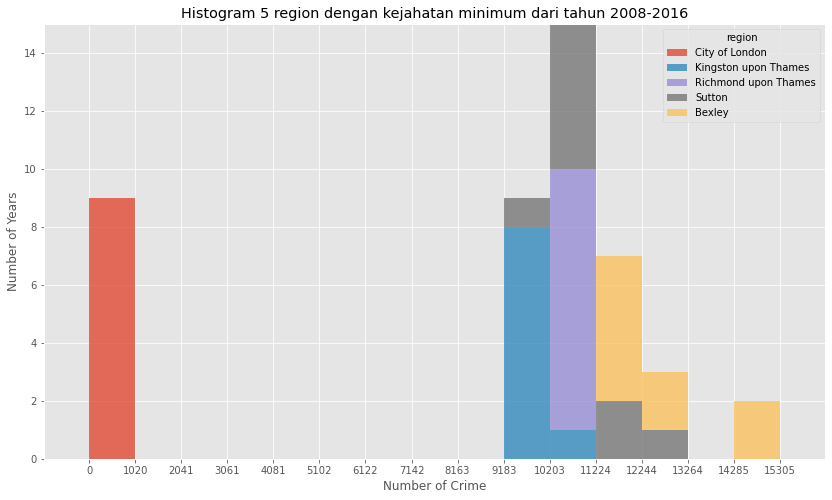

In [27]:
# Membuat bin untuk histogram
count, bin_edges = np.histogram(data_terendah, 15)

# memperindah tata letak histogram
xmin = bin_edges[0] - 1000
xmax = bin_edges[-1] + 1000

data_terendah.plot(kind='hist',
             figsize=(14,8),
             bins = 15,
             alpha=0.8,
             xticks=bin_edges,
             stacked=True,
             xlim=(xmin,xmax)
           )
plt.title('Histogram 5 region dengan kejahatan minimum dari tahun 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crime')
plt.show()

Conclusion :
Dapat dilihat dari histogram diatas yang menunjukkan 5 region dengan angka kejahatan terendah. Region dengan angka kejahatan terendah yaitu City of London

## Bar Chart

Question : Bagaimana persebaran kejahatan kategori minor di London pada tahun 2012?

In [28]:
#pengelompokan data di tahun 2012 berdasarkan minor category dan month  
data_month = data[data['year'] == 2012].groupby(['minor_category', 'month'])['value'].sum().reset_index()

#membuat data month menjadi index dengan metode pivot table
data_month = pd.pivot_table(data_month, values='value', index='month', columns='minor_category')

#membuat kolom total
data_month['Total'] = data_month.sum(axis=1)
data_month

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,Total
month,,,,,,,,,,,,,,,,,,,,,
1,4109,2514,6184,244,3339,0,1431,2409,560,307,...,536,2700,4724,0,6028,3086,1889,1452,542,62436
2,3716,2329,5310,195,3176,0,1420,2000,551,277,...,507,2601,4008,0,5583,2941,1664,1082,488,56735
3,4263,2840,5799,215,3514,0,1395,2493,574,435,...,545,3115,4303,0,6859,3415,2052,1808,611,67537
4,3952,2811,4721,209,2954,0,1256,2107,575,364,...,492,2785,3383,0,5522,3001,1945,1549,572,58801
5,4550,2693,4635,189,3431,0,1385,2308,616,293,...,595,2838,3649,0,6412,3075,2103,1855,613,64344
6,4503,2810,4701,200,3245,0,1330,2312,599,335,...,505,2792,4029,0,5786,2995,1958,1980,686,62281
7,4530,2680,4413,186,3388,0,1351,2180,536,376,...,574,2804,4174,0,5594,3140,1909,2153,605,63280
8,4511,2597,4647,176,3302,0,1249,2244,603,318,...,619,2503,4587,0,5199,2865,1788,2291,667,62143
9,4097,2425,4455,183,3162,0,1104,1895,502,287,...,560,2517,3821,0,4906,2700,1763,2093,598,56912


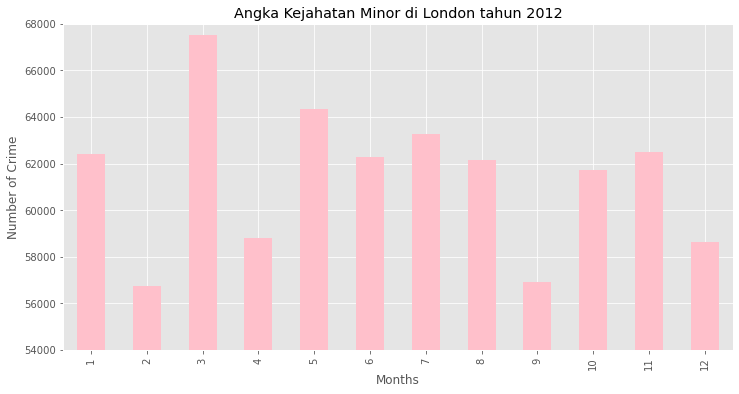

In [29]:
# Membuat bar chart berdasarkan total angka perbulan di tahun 2012
data_month['Total'].plot(kind='bar', figsize=(12,6), color='pink')

plt.ylim(54000,68000)
plt.title('Angka Kejahatan Minor di London tahun 2012')
plt.xlabel('Months')
plt.ylabel('Number of Crime')

plt.show()

Conclusion :
Jadi, dapat diketahui kejahatan kategori minor yang terjadi di London paling sering terjadi pada saat bulan Maret dan terendah pada saat bulan Februari

## Pie Chart

Question: Dimana sering terjadinya kejahatan di London pada tahun 2008 - 2016?

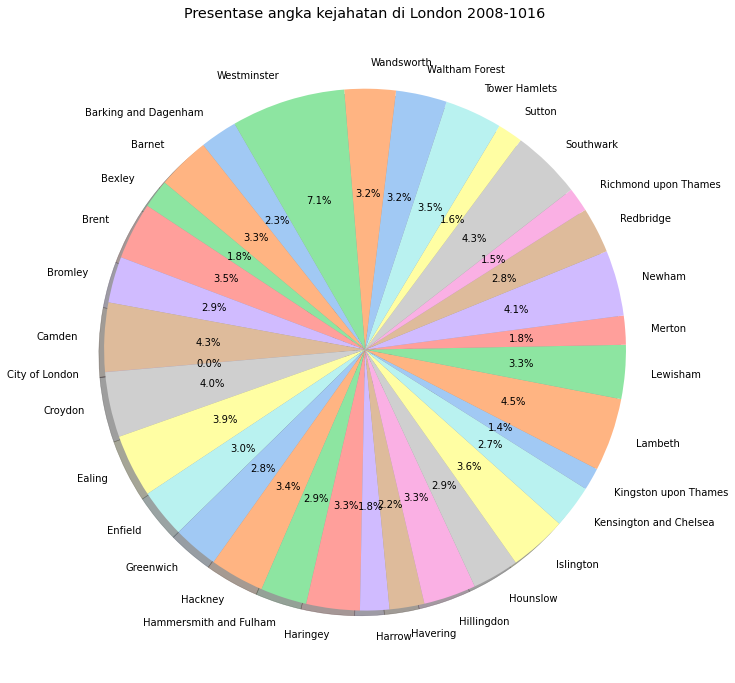

In [30]:
plt.figure(figsize=(12,12))
plt.pie(data=data_region,
        x='Total',
        labels = data_region.index,
        colors = sns.color_palette('pastel'),
        autopct='%1.1f%%',
        startangle=120,
        shadow=True,
       )
plt.title('Presentase angka kejahatan di London 2008-1016')
plt.show()

Conclusion :
Dapat diketahui dari pie chart diatas bahwa kejahatan tertinggi yang sering terjadi di London pada tahun 2008-2016 yaitu di region Westminster dengan presentase 7.1%

## Box Plot

Question : Bagaimana angka persebaran kejahatan pada region Newham?

In [31]:
# 5 region dengan kasus kejahatan terbanyak
data_region.sort_values(by='Total', ascending=False).head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
region,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


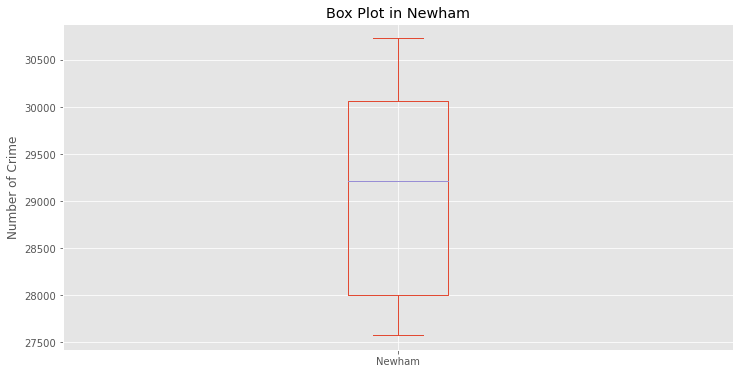

In [32]:
data_region.drop(columns='Total').loc['Newham'].plot(kind='box',figsize=(12,6))

plt.title('Box Plot in Newham')
plt.ylabel('Number of Crime')
plt.show()

Conclusion : Dari hasil box plot diatas dapat dilihat angka persebaran kejahatan yang terjadi di Newham yaitu berjumlah minimum 262024 dan maksimum 30728

## Scatter Plot

Question : Bagaimana petumbuhan angka kejahatan di region Lambeth dari 2008 -2016?

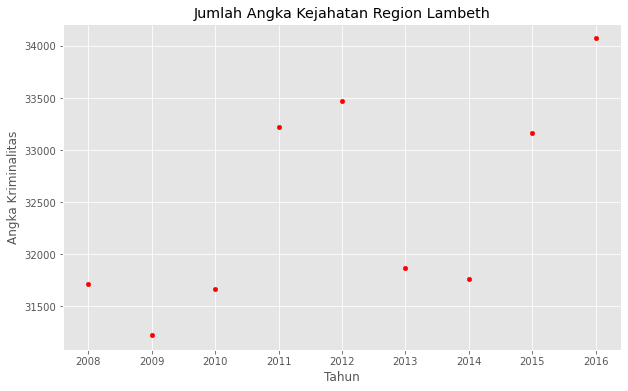

In [33]:
data_scatter = data[data['region'].isin(['Lambeth'])]
data_scatter = pd.DataFrame(data_scatter.groupby(['year']).sum())
data_scatter.reset_index(inplace=True)
data_scatter['year'] = range(2008,2017)

data_scatter.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='red')

plt.title('Jumlah Angka Kejahatan Region Lambeth')
plt.xlabel('Tahun')
plt.ylabel('Angka Kriminalitas')

plt.show()

Conclusion : Dapat dilihat dari scatter plot diatas jumlah angka kejahatan di region Lambeth pada tahun 2008-2016, dimana tingkat angka kejahatan terendah ada pada tahun 2009 dan angka kejahatan tertinggi ada pada tahun 2016

## Word Cloud

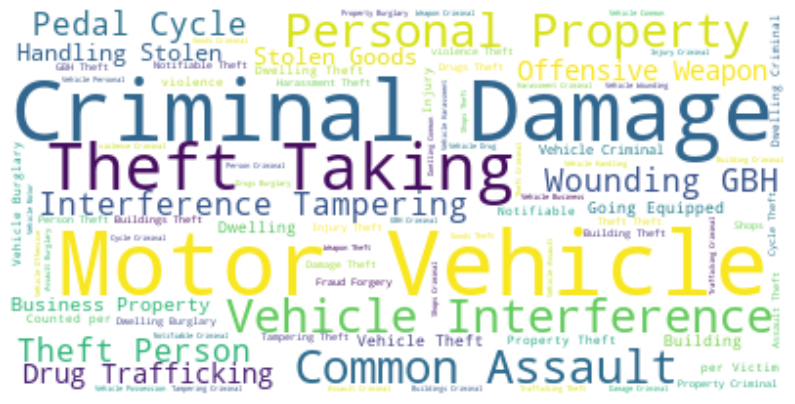

In [34]:
stopwords = set(STOPWORDS)
crime_wc = WordCloud(
    background_color='white', 
    stopwords=stopwords,
    max_words=2000
)
crime_wc.generate(' '.join(data.minor_category))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Overall Analysis

1. Area Plot : 
    Menganalisis kejahatan kategori minor yang terjadi di London pada tahun 2008-2016 menggunakan area plot. Hasil yang didapat yaitu "Other Thief" adalah kejahatan kategori minor yang sering terjadi di London.
    
2. Histogram :  
    Menganalisis seberapa jarang kejahatan minor terjadi pada setiap region yang berada di London. Hasil yang didapat yaitu region City of London memiliki tingkat kejahatan yang rendah diantara region yang lain.
    
3. Bar Chart :  
    Menganalisis persebaran angka kejahatan kategori minor di London pada tahun 2012. Hasil yang didapat yaitu tingkat angka kejahatan tertinggi terjadi pada bulan Maret dan tingkat angka kejahatan terendah terjadi pada bulan Februari.
    
4. Pie Chart :  
    Menganalisis region yang memiliki presentase tingkat kejahatan yang terjadi di London pada tahun 2008-2016. Hasil yang didapat yaitu tingkat kejahatan tertinggi terjadi di Westminster dengan presentase 7% dari keseluruhan.
    
5. Box Plot :
    Menganalisis persebaran tingkat kejahatan di region Newham. Hasil yang didapat yaitu angka persebaran kejahatan yang terjadi di Newham berjumlah minimum 262024 dan maksimum 30728

6. Scatter Plot :
    Menganalisis pertumbuhan angka kejahatan di region Lambeth pada tahun 2008-2016. Hasil yang didapat yaitu  tingkat angka kejahatan terendah yang terjadi di region Lambeth ada pada tahun 2009 dan angka kejahatan tertinggi ada pada tahun 2016.